## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [4]:
# look at the mouse data
print(mouse_metadata.shape)
mouse_metadata.head(3)

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [8]:
# understanding what the data is telling me
mouse_metadata['Mouse ID'].value_counts()

l471    1
q597    1
n482    1
n763    1
a520    1
       ..
g791    1
g316    1
a251    1
c282    1
k510    1
Name: Mouse ID, Length: 249, dtype: int64

In [15]:
# Checking the number of mice.
mouse_metadata.info()
print()
print(f'The number of mice is {len(mouse_metadata)}.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB

The number of mice is 249.


In [16]:
# looking at the study data
print(study_results.shape)
study_results.head(3)

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [17]:
# create a dataframe with both data sets
df = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# understanding the data, again
print(df['Mouse ID'].value_counts())
print()
print(df["Mouse ID"].nunique())

g989    13
l471    10
j119    10
i738    10
l509    10
        ..
n482     1
o848     1
d133     1
t573     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

249


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
(ddf.duplicated(subset=["Mouse ID","Timepoint"]).value_counts()


False    1888
True        5
dtype: int64

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df.duplicated(subset=["Mouse ID","Timepoint"]) == True
df.loc[mask]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
df.loc[850:881,:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
850,m269,0,45.000000,0,Stelasyn,Female,22,28
851,m269,5,49.011180,0,Stelasyn,Female,22,28
852,m269,10,50.860130,0,Stelasyn,Female,22,28
853,m269,15,55.905344,0,Stelasyn,Female,22,28
854,m269,20,61.145866,0,Stelasyn,Female,22,28
855,m269,25,64.893020,0,Stelasyn,Female,22,28
856,m269,30,67.712510,1,Stelasyn,Female,22,28
857,m269,35,68.689917,1,Stelasyn,Female,22,28
858,m269,40,70.214644,1,Stelasyn,Female,22,28
859,m269,45,75.123690,1,Stelasyn,Female,22,28


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = df['Mouse ID'] != 'g989'
df_clean = df.loc[mask2].reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [46]:
# Checking the number of mice in the clean DataFrame.
mice = df_clean['Mouse ID'].nunique()
print(df_clean.describe())
print()
print(f'The number of mice in the clean DataFrame is {mice}.')

         Timepoint  Tumor Volume (mm3)  Metastatic Sites   Age_months  \
count  1880.000000         1880.000000       1880.000000  1880.000000   
mean     19.606383           50.435293          1.025000    12.757979   
std      14.094238            8.914197          1.139971     7.181998   
min       0.000000           22.050126          0.000000     1.000000   
25%       5.000000           45.000000          0.000000     7.000000   
50%      20.000000           48.933454          1.000000    13.000000   
75%      30.000000           56.324075          2.000000    19.250000   
max      45.000000           78.567014          4.000000    24.000000   

        Weight (g)  
count  1880.000000  
mean     25.660106  
std       3.935064  
min      15.000000  
25%      25.000000  
50%      27.000000  
75%      29.000000  
max      30.000000  

The number of mice in the clean DataFrame is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [47]:
# re-look at the data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [48]:
# checking to see the columns perform as expected
df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [53]:
# now actually making the DataFrame
drug_tumor = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

avg_tumor = drug_tumor.mean()
med_tumor = drug_tumor.median()
var_tumor = drug_tumor.var()
std_tumor = drug_tumor.std()
sem_tumor = drug_tumor.sem()

summary_table = pd.DataFrame()
summary_table['Mean Tumor Volume'] = avg_tumor
summary_table['Median Tumor Volume'] = med_tumor
summary_table['Variance, Tumor Volume'] = var_tumor
summary_table['St. Deviation, Tumor Volume'] = std_tumor
summary_table['St. Error, Tumor Volume'] = sem_tumor

summary_table

,Mean Tumor Volume,Median Tumor Volume,"Variance, Tumor Volume","St. Deviation, Tumor Volume","St. Error, Tumor Volume"
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# super coooool!
drug_tumor.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [56]:
print(df_clean.columns)
df_clean.head(2)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22


In [67]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
unique_mice = pd.DataFrame({'count':df_clean.groupby('Drug Regimen')['Mouse ID'].nunique()}).reset_index()

# right number of mice?
print(sum(unique_mice['count']))

unique_mice

248


,Drug Regimen,count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [94]:
df_clean.groupby('Drug Regimen')['Mouse ID'].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

<Figure size 792x504 with 0 Axes>

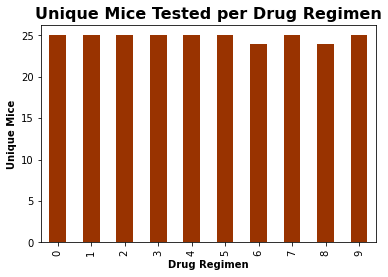

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [98]:
plt.figure(figsize = (11,7))

# http://dmcritchie.mvps.org/excel/colors.htm
unique_mice.plot(kind='bar', use_index=False, color='#993300', legend = False)
plt.title('Unique Mice Tested per Drug Regimen', fontsize = 16, fontweight='bold')
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('Unique Mice', fontweight='bold')
plt.show()
unique_mice['Drug Regimen']

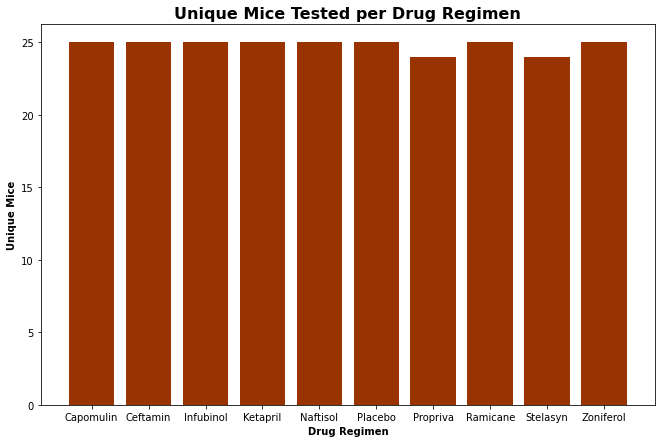

In [99]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize = (11,7))

x = unique_mice['Drug Regimen']
y = unique_mice['count']

# http://dmcritchie.mvps.org/excel/colors.htm
plt.bar(x,y, color = '#993300')
plt.title('Unique Mice Tested per Drug Regimen', fontsize = 16, fontweight='bold')
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('Unique Mice', fontweight='bold')
plt.show()

In [120]:
# the unique mice per regimen was not terribly interesting - going to attempt to plot the mice with timepoints per regimen
#collect trials
trials = pd.DataFrame(df_clean['Drug Regimen'].value_counts()).reset_index()
trials = trials.rename(columns={'index':'Drug Regimen','Drug Regimen':'trials'})
trials

,Drug Regimen,trials
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


In [130]:
# combine unique mice and trials, getting trials per mouse
mice_tp_df = unique_mice.merge(trials, on="Drug Regimen", how="inner")
mice_tp_df['trials per mouse'] = mice_tp_df['trials'] / mice_tp_df['count']
mice_tp_df = mice_tp_df.sort_values(by=['trials per mouse'], ascending=False).reset_index()
mice_tp_df

,index,Drug Regimen,count,trials,trials per mouse
0,0,Capomulin,25,230,9.200000
1,7,Ramicane,25,228,9.120000
2,8,Stelasyn,24,181,7.541667
3,3,Ketapril,25,188,7.520000
4,4,Naftisol,25,186,7.440000
5,9,Zoniferol,25,182,7.280000
6,5,Placebo,25,181,7.240000
7,1,Ceftamin,25,178,7.120000
8,2,Infubinol,25,178,7.120000
9,6,Propriva,24,148,6.166667


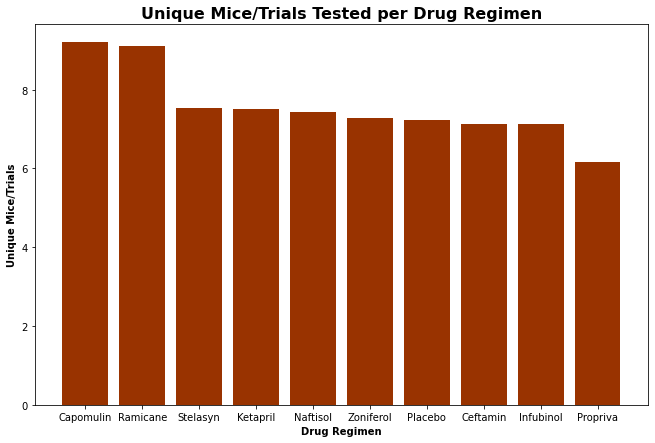

In [131]:
#plot the trials per mouse
plt.figure(figsize = (11,7))

x = mice_tp_df['Drug Regimen']
y = mice_tp_df['trials per mouse']

# http://dmcritchie.mvps.org/excel/colors.htm
plt.bar(x,y, color = '#993300')
plt.title('Unique Mice/Trials Tested per Drug Regimen', fontsize = 16, fontweight='bold')
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('Unique Mice/Trials', fontweight='bold')
plt.show()

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#reminder of data
df_clean.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [141]:
# get the counts of female and male mice
df_clean.groupby('Sex')['Mouse ID'].nunique()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [157]:
gender_df = pd.DataFrame(df_clean.groupby('Sex')['Mouse ID'].nunique())
gender_df = gender_df.rename(columns={'Mouse ID':'count'})
gender_df

,count
Sex,
Female,123
Male,125


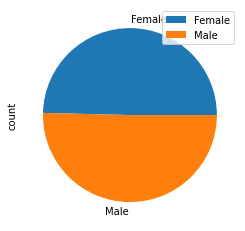

In [159]:
# plot with pandas


gender_df.plot.pie(y='count')

<ipython-input-178-07f9051f154f>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_df, labels=['Female','Male'],colors = ['#FFCC99','#99CCFF'], autopct="%1.1f%%")


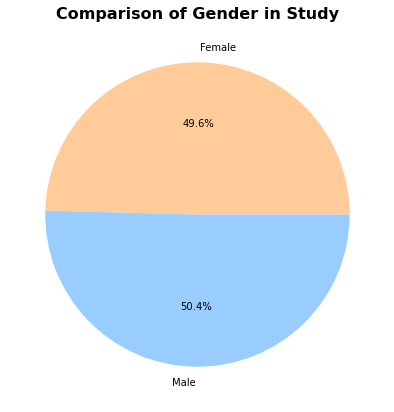

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (11,7))

plt.pie(gender_df, labels=['Female','Male'],colors = ['#FFCC99','#99CCFF'], autopct="%1.1f%%")
plt.title('Comparison of Gender in Study', fontsize = 16, fontweight='bold')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [198]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
#limit to the above regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_final = df_clean.loc[df_clean["Drug Regimen"].isin(regimens)].reset_index(drop=True)
print(len(df_final))
df_clean.groupby('Drug Regimen').count()

814


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [183]:
230 + 228 + 178 + 178

814

In [199]:
df_final.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [200]:
df_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [190]:
# Start by getting the last (greatest) timepoint for each mouse
# get the greatest timepoint per mouse
last_tp_df = pd.DataFrame(df_final.groupby('Mouse ID')['Timepoint'].max()).reset_index()
last_tp_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [191]:
# is it 45 for every mouse, by coincidence?
last_tp_df.Timepoint.value_counts()

45    63
30     9
5      6
35     4
15     4
0      4
25     3
20     3
40     2
10     2
Name: Timepoint, dtype: int64

In [201]:
# check the df_final for rows where mouse id and timepoint match the rows in last_tp_df
df_final_tp = pd.DataFrame()

for indx, row in last_tp_df.iterrows():
    mask = ((df_final['Mouse ID'] == row['Mouse ID']) & (df_final['Timepoint'] == row['Timepoint']))
    match = df_final.loc[mask]
    df_final_tp = df_final_tp.append(match)
    
df_final_tp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
342,a203,45,67.973419,2,Infubinol,Female,20,23
86,a251,45,65.525743,1,Infubinol,Female,21,25
526,a275,45,62.999356,3,Ceftamin,Female,20,28
137,a411,45,38.407618,1,Ramicane,Male,3,22
147,a444,45,43.047543,0,Ramicane,Female,10,25


In [203]:
df_final_tp = df_final_tp.reset_index(drop=True)
df_final_tp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [204]:
# Put treatments into a list for for loop (and later for plot labels)
regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [211]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask = df_final_tp['Drug Regimen'] == regimen
    tumor = df_final_tp.loc[mask, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(tumor.values)

    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(regimen)
    print(f'Lower quartile of tumor volume is {lowerq}.')
    print(f'Upper quartile of tumor volume is {upperq}.')
    print(f'Interquartile range of tumor volume is {iqr}.')
    
    lower_outlier = lowerq - (1.5*iqr)
    upper_outlier = upperq + (1.5*iqr)
    print(f'Volumes below {lower_outlier} could be outliers.')
    print(f'Volumes above {upper_outlier} could be outliers.')
    print()

Capomulin
Lower quartile of tumor volume is 32.37735684.
Upper quartile of tumor volume is 40.1592203.
Interquartile range of tumor volume is 7.781863460000004.
Volumes below 20.70456164999999 could be outliers.
Volumes above 51.83201549 could be outliers.

Ramicane
Lower quartile of tumor volume is 31.56046955.
Upper quartile of tumor volume is 40.65900627.
Interquartile range of tumor volume is 9.098536719999998.
Volumes below 17.912664470000003 could be outliers.
Volumes above 54.30681135 could be outliers.

Infubinol
Lower quartile of tumor volume is 54.04860769.
Upper quartile of tumor volume is 65.52574285.
Interquartile range of tumor volume is 11.477135160000003.
Volumes below 36.83290494999999 could be outliers.
Volumes above 82.74144559000001 could be outliers.

Ceftamin
Lower quartile of tumor volume is 48.72207785.
Upper quartile of tumor volume is 64.29983003.
Interquartile range of tumor volume is 15.577752179999997.
Volumes below 25.355449580000002 could be outliers.
Vol

In [212]:
tumor_vol

[array([38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203 ,
        47.68596303, 37.31184577, 38.1251644 , 38.75326548, 41.48300765,
        38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684,
        41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294,
        40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384 ]),
 array([38.4076183 , 43.0475426 , 38.81036633, 32.97852192, 38.34200823,
        33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217,
        36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509,
        31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077,
        30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]),
 array([67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309 ,
        36.3213458 , 60.96971133, 62.43540402, 60.91876652, 67.28962147,
        66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846,
        45.69933088, 54.65654872, 55.65068132, 

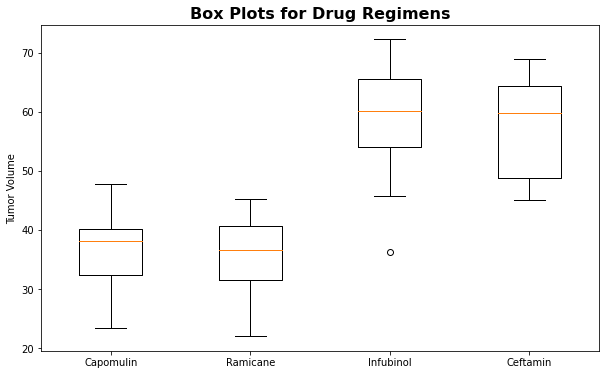

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(tumor_vol, labels = regimens)

plt.ylabel('Tumor Volume')
plt.title('Box Plots for Drug Regimens', fontsize=16,fontweight='bold')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
